#**Loading and Preprocessing Data**

In [1]:
import pandas as pd
import altair as alt
import plotly.graph_objects as go

woody_breaking_stats = 'https://drive.usercontent.google.com/download?id=1VV_OmRfxTJ0WWtLd8mMT93kind-91A0y&export=download&authuser=0&confirm=t&uuid=28ea378c-9a3d-4407-ae7b-9dc5f8535083&at=APZUnTUCOhcajX9gfndCLFxlmbXH:1715189853628'
woody_colored_stats = 'https://drive.usercontent.google.com/download?id=1fKNFZmWwecC1tZokVOEfp16svKg0YHi8&export=download&authuser=0&confirm=t&uuid=ee245844-cbd6-4735-9a3b-8cc8c9f528b3&at=APZUnTWHBnbcwWyzXNDkSNevT-E4:1715189854283'
redmaple_colored_stats = 'https://drive.usercontent.google.com/download?id=1J2CSdyS28BdefqCtWQg--sxQAvMtuJoB&export=download&authuser=0&confirm=t&uuid=89bd8b7c-04a1-4e15-ade9-15b8b5be75dc&at=APZUnTVv40oYdWQKaj6d9GjrXGqj:1715189852194'
redmaple_breaking_stats = 'https://drive.usercontent.google.com/download?id=11RwxOYck8U52NZFsQ1wNQ1LmD44sMhU3&export=download&authuser=0&confirm=t&uuid=0cab6140-921e-4852-807d-bb5395eedf44&at=APZUnTX1sO7YILeQhdrMqZtJAs8z:1715189851339'
herb_mohonk_stats = 'https://drive.usercontent.google.com/download?id=1-0e3Tb113UlFaKCeFTIslJtUNukEnsyp&export=download&authuser=0&confirm=t&uuid=87e2b2b0-0e85-4908-ba87-e1a497146ff5&at=APZUnTWQ3-zscU7u01lZmoRRCqrR:1715189850138'
herb_fls_stats = 'https://drive.usercontent.google.com/download?id=18hYy98jXAdDRL_KyZ4GwS2jy33FN_-nF&export=download&authuser=0&confirm=t&uuid=92c34221-2278-4baf-8377-6c4f4abd1e99&at=APZUnTWlmy1_iRrX4W5Zuj5EZByH:1715189849269'

df1 = pd.read_csv(woody_breaking_stats)
df2 = pd.read_csv(woody_colored_stats)
df3 = pd.read_csv(redmaple_colored_stats)
df4 = pd.read_csv(redmaple_breaking_stats)
df5 = pd.read_csv(herb_mohonk_stats)
df6 = pd.read_csv(herb_fls_stats)

df_all = pd.concat([df1, df2, df3, df4, df5, df6])
print(df_all.shape)


(1577, 9)


In [2]:
df_all['grouping'] = df_all['grouping'].str.replace("['()]",'',regex=True)

In [3]:
df_all['State'] = df_all['grouping'].str.split(',').str[-1].str.strip()
df_all['site'] = df_all['grouping'].str.split(',').str[-2].str.strip()

In [4]:
df_all.head()

,dataset,event,grouping,observations,Pearson r,Kendall τ,slope,R²,p-value,State,site
0,pheno_woody,breaking leaves,"Acer, rubrum, Home, ME",6,0.5227,0.3333,4.4000,0.2732,0.2927,ME,Home
1,pheno_woody,breaking leaves,"Acer, saccharum, Home, ME",13,-0.0738,-0.0645,-0.1319,0.0054,0.7314,ME,Home
2,pheno_woody,breaking leaves,"Amelanchier, arborea, Home, ME",13,-0.5149,-0.3637,-0.8242,0.2651,0.0567,ME,Home
3,pheno_woody,breaking leaves,"Betula, papyrifera, Home, ME",13,-0.1559,-0.2783,-0.3242,0.0243,0.5529,ME,Home
4,pheno_woody,breaking leaves,"Forsythia, spp., Home, ME",13,0.0137,-0.2598,0.0275,0.0002,0.9634,ME,Home


In [5]:
df_break = df_all[df_all['event'] == 'breaking leaves']
df_color = df_all[df_all['event'] == 'colored leaves']
df_bloom = df_all[df_all['event'] == 'bloom']

# **Analysis of Breaking Leaves**

#### Average p-value by state

In [6]:
state_means = df_break.groupby('State')[['Pearson r',
       'Kendall τ', 'slope', 'R²', 'p-value']].mean()
state_means = state_means.reset_index()

import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['p-value'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "p-value",
))

fig.update_layout(
    title_text = 'mean p-value by state',
    geo_scope='usa',
)

fig.show()


#### Average correlation coefficient by State

In [7]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['Pearson r'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'YlGnBu' ,
    colorbar_title = "Pearson correlation coefficient",
))

fig.update_layout(
    title_text = 'mean correlation coefficient by state',
    geo_scope='usa',
)

fig.show()

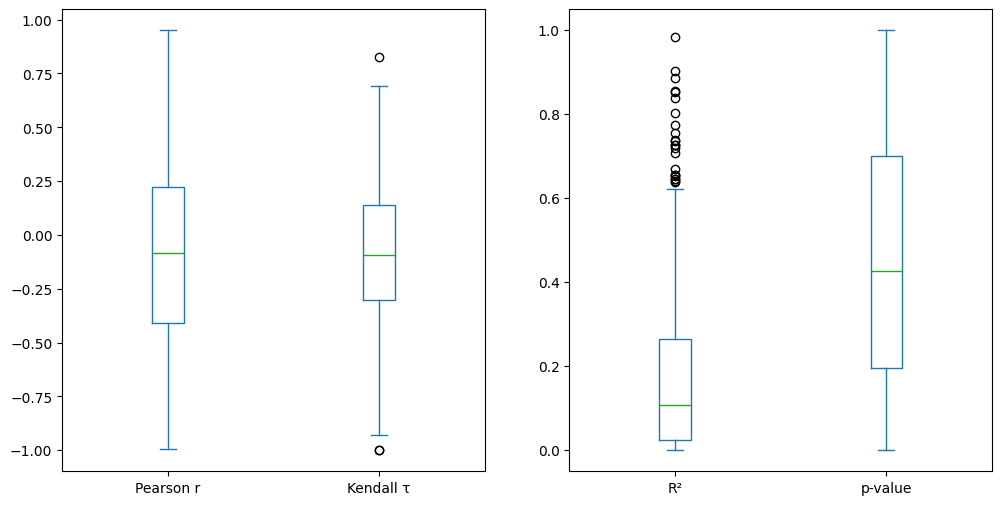

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_break[['Pearson r','Kendall τ']].plot.box(ax=axs[0])
df_break[['R²','p-value']].plot.box(ax=axs[1])

plt.show()

In [9]:
import altair as alt

chart1 = alt.Chart(df_break).mark_point().encode(
    x='p-value',
    y='Kendall τ',
    tooltip=['site', 'State', 'p-value', 'Kendall τ']
).interactive().properties(width=600, height=400, title='Kendall τ against p-value' )

chart2 = alt.Chart(df_break).mark_point().encode(
    x='p-value',
    y='Pearson r',
    tooltip=['site', 'State', 'p-value', 'Pearson r']
).interactive().properties(width=600, height=400, title='Pearson r against p-value')

rule1 = alt.Chart(df_break).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

rule2 = alt.Chart(df_break).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

layer_chart = (chart1 + rule1) | (chart2 + rule2)
layer_chart.spacing = 50
layer_chart

alt.HConcatChart(...)

## Instances with p-value < .05

In [23]:
sub_df_break = df_break[df_break['p-value']<.05]
print(sub_df_break.shape, ' down from ', df_break.shape)
print(sub_df_break.sort_values('p-value').to_markdown())

(40, 11)  down from  (643, 11)
|     | dataset     | event           | grouping                                                                                  |   observations |   Pearson r |   Kendall τ |    slope |     R² |   p-value | State   | site                                                  |
|----:|:------------|:----------------|:------------------------------------------------------------------------------------------|---------------:|------------:|------------:|---------:|-------:|----------:|:--------|:------------------------------------------------------|
|  88 | pheno_woody | breaking leaves | Quercus, rubra, Bridge Trail, NY                                                          |             12 |     -0.841  |     -0.7385 |  -3.9879 | 0.7072 |    0.0006 | NY      | Bridge Trail                                          |
| 251 | pheno_woody | breaking leaves | Tilia, americana, Cayuga Nature Center, NY                                                |             

In [34]:
state_counts = sub_df_break['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Number of significant instances by State',
    geo_scope='usa',
)

fig.show()

# **Analysis of Colored Leaves**

#### Average p-value by state



In [10]:
state_means = df_color.groupby('State')[['Pearson r',
       'Kendall τ', 'slope', 'R²', 'p-value']].mean()
state_means = state_means.reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['p-value'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "p-value",
))

fig.update_layout(
    title_text = 'mean p-value by state',
    geo_scope='usa',
)

fig.show()

####Average correlation by state

In [11]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['Pearson r'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'YlGnBu' ,
    colorbar_title = "Pearson correlation coefficient",
))

fig.update_layout(
    title_text = 'mean correlation coefficient by State',
    geo_scope='usa',
)

fig.show()

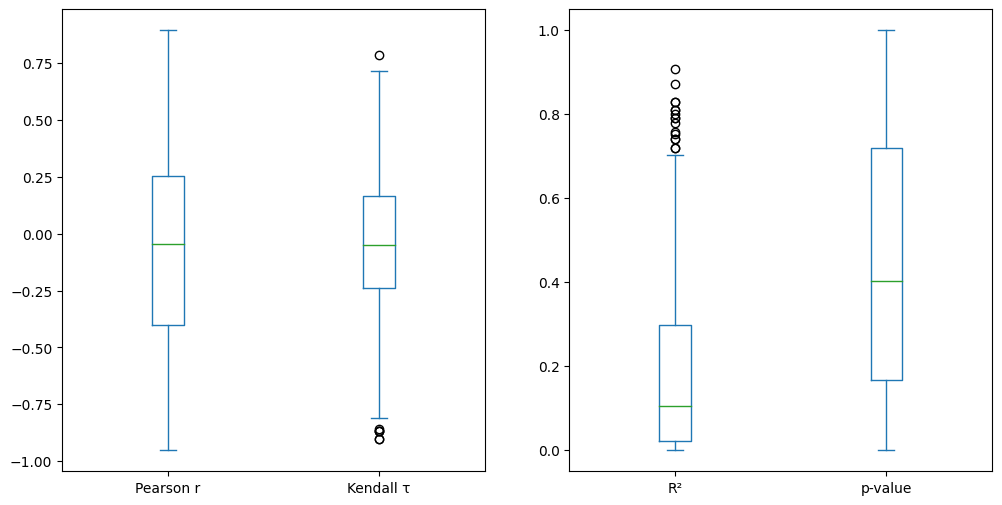

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_color[['Pearson r','Kendall τ']].plot.box(ax=axs[0])
df_color[['R²','p-value']].plot.box(ax=axs[1])

plt.show()

In [13]:

chart1 = alt.Chart(df_color).mark_point().encode(
    x='p-value',
    y='Kendall τ',
    tooltip=['site', 'State', 'p-value', 'Kendall τ']
).interactive().properties(width=600, height=400, title='Kendall τ against p-value' )

chart2 = alt.Chart(df_color).mark_point().encode(
    x='p-value',
    y='Pearson r',
    tooltip=['site', 'State', 'p-value', 'Pearson r']
).interactive().properties(width=600, height=400, title='Pearson r against p-value')

rule1 = alt.Chart(df_color).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

rule2 = alt.Chart(df_color).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

layer_chart = (chart1 + rule1) | (chart2 + rule2)
layer_chart.spacing = 50
layer_chart

alt.HConcatChart(...)

## Instances with p-value < .05

In [24]:
sub_df_color = df_color[df_color['p-value']<.05]
print(sub_df_color.shape, ' down from ', df_color.shape)
print(sub_df_color.sort_values('p-value').to_markdown())

(59, 11)  down from  (605, 11)
|     | dataset     | event          | grouping                                                       |   observations |   Pearson r |   Kendall τ |    slope |     R² |   p-value | State   | site                                   |
|----:|:------------|:---------------|:---------------------------------------------------------------|---------------:|------------:|------------:|---------:|-------:|----------:|:--------|:---------------------------------------|
|   7 | pheno_woody | colored leaves | Magnolia, stellata, Home, ME                                   |              8 |     -0.9106 |     -0.8571 |  -5.1171 | 0.8292 |    0.0015 | ME      | Home                                   |
|   2 | pheno_woody | colored leaves | Betula, papyrifera, Home, ME                                   |             13 |     -0.7368 |     -0.6154 |  -2.6714 | 0.5429 |    0.0029 | ME      | Home                                   |
| 419 | pheno_woody | colored leaves | Ca

In [36]:

state_counts = sub_df_color['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Number of significant instances by State',
    geo_scope='usa',
)

fig.show()

# **Analysis of Bloom**

####Average p-value by state

In [14]:
state_means = df_bloom.groupby('State')[['Pearson r',
       'Kendall τ', 'slope', 'R²', 'p-value']].mean()
state_means = state_means.reset_index()

import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['p-value'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "p-value",
))

fig.update_layout(
    title_text = 'mean p-value by state',
    geo_scope='usa',
)

fig.show()


####Average correlation by state

In [15]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['Pearson r'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'YlGnBu' ,
    colorbar_title = "Pearson correlation coefficient",
))

fig.update_layout(
    title_text = 'mean correlation coefficient by state',
    geo_scope='usa',
)

fig.show()

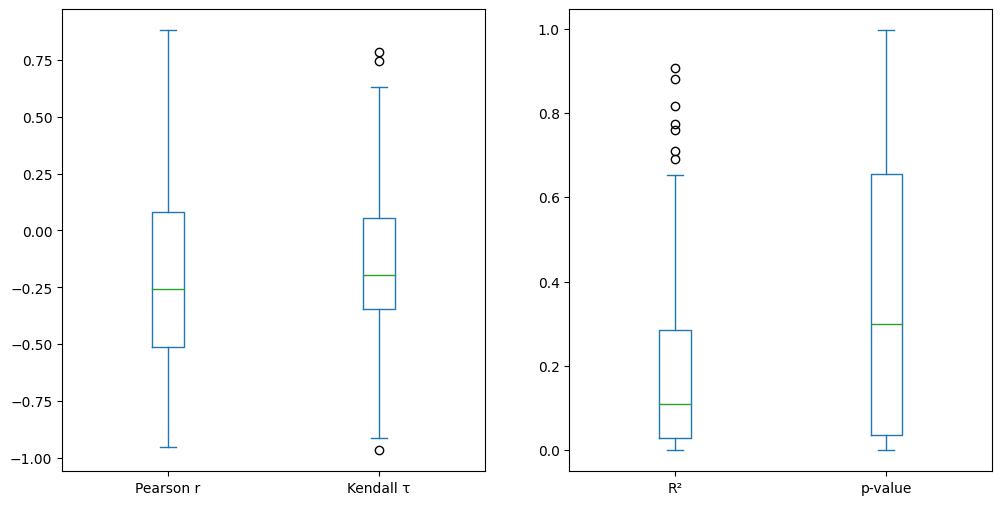

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_bloom[['Pearson r','Kendall τ']].plot.box(ax=axs[0])
df_bloom[['R²','p-value']].plot.box(ax=axs[1])

plt.show()

In [17]:
import altair as alt

chart1 = alt.Chart(df_bloom).mark_point().encode(
    x='p-value',
    y='Kendall τ',
    tooltip=['site', 'State', 'p-value', 'Kendall τ']
).interactive().properties(width=600, height=400, title='Kendall τ against p-value' )

chart2 = alt.Chart(df_bloom).mark_point().encode(
    x='p-value',
    y='Pearson r',
    tooltip=['site', 'State', 'p-value', 'Pearson r']
).interactive().properties(width=600, height=400, title='Pearson r against p-value')

rule1 = alt.Chart(df_bloom).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

rule2 = alt.Chart(df_bloom).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

layer_chart = (chart1 + rule1) | (chart2 + rule2)
layer_chart.spacing = 50
layer_chart

alt.HConcatChart(...)

## Instances with p-value < .05

In [25]:
sub_df_bloom = df_bloom[df_bloom['p-value']<.05]
print(sub_df_bloom.shape, ' down from ', df_bloom.shape)
print(sub_df_bloom.sort_values('p-value').to_markdown())

(90, 11)  down from  (329, 11)
|     | dataset      | event   | grouping                                              |   observations |   Pearson r |   Kendall τ |   slope |     R² |   p-value | State   | site                       |
|----:|:-------------|:--------|:------------------------------------------------------|---------------:|------------:|------------:|--------:|-------:|----------:|:--------|:---------------------------|
|   2 | herbs_mohonk | bloom   | Penstemon, digitalis, Mohonk, NY                      |             16 |     -0.8718 |     -0.6156 | -0.4227 | 0.7601 |    0      | NY      | Mohonk                     |
|  88 | herbs_mohonk | bloom   | Ageratina, altissima, Mohonk, NY                      |             30 |     -0.6711 |     -0.525  | -1.1259 | 0.4503 |    0      | NY      | Mohonk                     |
|  72 | herbs_mohonk | bloom   | Trillium, erectum, Mohonk, NY                         |             55 |     -0.5046 |     -0.3456 | -0.1671 | 0.2547 | 

In [37]:
import pandas as pd
import plotly.graph_objects as go

state_counts = sub_df_bloom['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Number of significant instances by State',
    geo_scope='usa',
)

fig.show()